In [4]:
import pandas as pd

# loading data
pulls_one = pd.read_csv("./datasets/pulls_2011-2013.csv")
pulls_two = pd.read_csv("./datasets/pulls_2014-2018.csv")
pull_files = pd.read_csv("./datasets/pull_files.csv")

In [5]:
## Prepare and cleaning data
# append pull_one to pull_two
pulls = pd.concat([pulls_one, pulls_two])

# convert the date for the puls object
pulls['date'] = pd.to_datetime(pulls['date'], utc=True)

In [6]:
## Merging the datarames
data = pulls.merge(pull_files, on='pid')
data.head()

,pid,user,date,file
0,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/api/Printers.scala
1,11166973,VladimirNik,2013-12-31 23:10:55+00:00,src/reflect/scala/reflect/internal/Printers.scala
2,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/files/run/reify_ann3.check
3,11166973,VladimirNik,2013-12-31 23:10:55+00:00,test/junit/scala/reflect/internal/PrintersTest...
4,11161892,Ichoran,2013-12-31 16:55:47+00:00,src/library/scala/collection/mutable/ArrayOps....


<Axes: xlabel='month,year'>

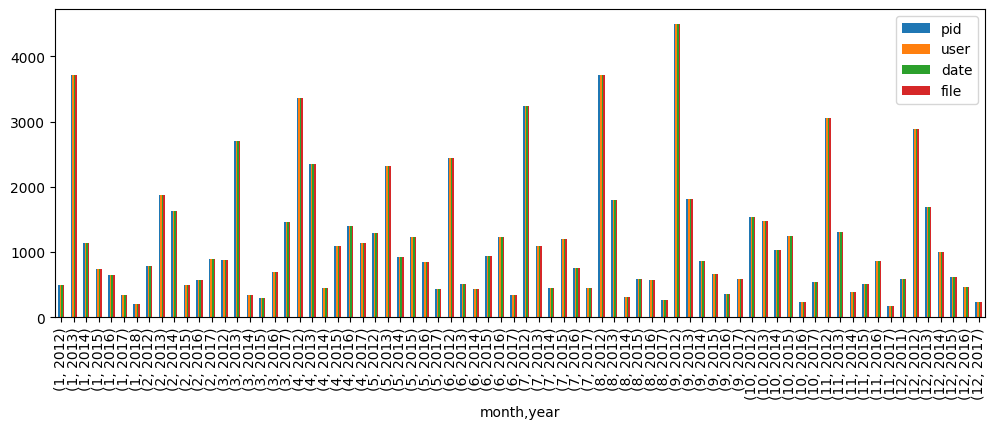

In [8]:
# Create a column that will store the month
data['month'] = pd.DatetimeIndex(data['date']).month

# Create a column that will store the year
data['year'] = pd.DatetimeIndex(data['date']).year

# Group by the month and year and count the pull requests
counts = data.groupby(['month', 'year']).count()

# Plot the results
counts.plot(kind='bar', figsize=(12, 4))

In [9]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Is the project welcoming to the new contributors?')

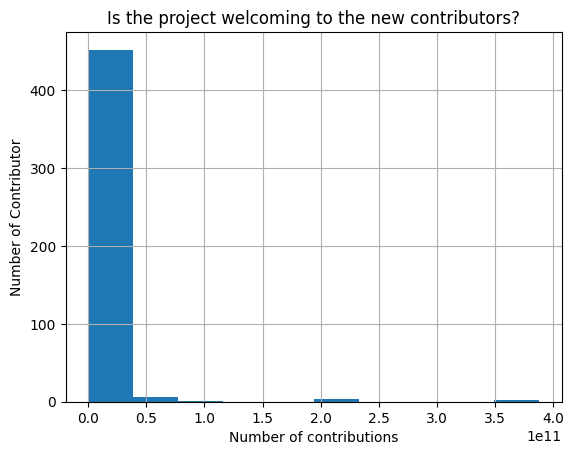

In [10]:
# Group by the submitter
by_user = data.groupby('user').agg({'pid':'sum'})

# Plot the histogram
by_user.hist(bins=10)
plt.xlabel('Number of contributions')
plt.ylabel('Number of Contributor')
plt.title('Is the project welcoming to the new contributors?')

In [12]:
# Identify the last 10 pull requests
last_10 = pulls.nlargest(10, 'pid', keep='last')

# join the 2 datasets
joined_pr = last_10.merge(pull_files, on='pid')

# Identify the unique files
files = set(joined_pr['file'].unique())

# Print the results
files

{'LICENSE',
 'doc/LICENSE.md',
 'doc/License.rtf',
 'project/VersionUtil.scala',
 'src/compiler/scala/reflect/reify/phases/Calculate.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/BCodeHelpers.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/PostProcessor.scala',
 'src/compiler/scala/tools/nsc/backend/jvm/analysis/BackendUtils.scala',
 'src/compiler/scala/tools/nsc/profile/AsyncHelper.scala',
 'src/compiler/scala/tools/nsc/profile/Profiler.scala',
 'src/compiler/scala/tools/nsc/symtab/classfile/ClassfileParser.scala',
 'src/compiler/scala/tools/nsc/typechecker/Contexts.scala',
 'src/library/scala/Predef.scala',
 'src/library/scala/concurrent/Lock.scala',
 'src/library/scala/util/Properties.scala',
 'src/reflect/scala/reflect/internal/pickling/ByteCodecs.scala',
 'src/reflect/scala/reflect/internal/tpe/GlbLubs.scala',
 'src/scaladoc/scala/tools/nsc/doc/html/page/Entity.scala',
 'src/scalap/decoder.properties',
 'test/files/neg/leibniz-liskov.check',
 'test/files/neg/leibniz-liskov

In [13]:
joined_pr.head(5)

,pid,user,date,file
0,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Among.java
1,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t5638/Usage.scala
2,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/pos/t9291.scala
3,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348.check
4,163314316,hrhino,2018-01-16 23:29:16+00:00,test/files/run/t8348/TableColumn.java


In [14]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Identify the commits that changed the file
file_pr = data[data['file']==file]

# Count the number of changes make by each developer
author_counts = file_pr.groupby('user').count()

# Print the top 3 developers
print(list(author_counts.nlargest(3, 'pid').index))

['xeno-by', 'retronym', 'soc']


In [18]:
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests that changed the target file
file_pr = pull_files[pull_files['file'] == file]

# Merge the obtained results with the pulls DataFrame
joined_pr = file_pr.merge(pulls, on = 'pid')

# Find the users of the last 10 most recent pull requests
users_last_10 = set(joined_pr.nlargest(10, 'pid', keep = 'last')['user'])

# Printing the results
users_last_10

{'bjornregnell', 'retronym', 'soc', 'starblood', 'xeno-by', 'zuvizudar'}

<Axes: xlabel='date'>

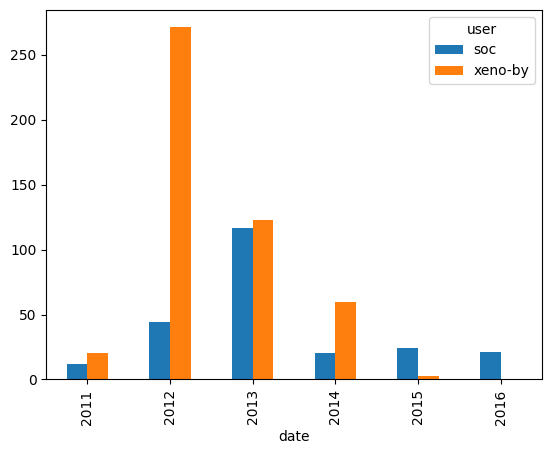

In [22]:
# The developers we are interested in
authors = ['xeno-by', 'soc']

# Get all the developers' pull requests
by_author = pulls[pulls['user'].isin(authors)]

# COunt the number of pull requests submitted each year
counts = by_author.groupby(['user', by_author.date.dt.year]).agg({'pid': 'count'}).reset_index()

# Convert the table to a wide format
counts_wide = counts.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
counts_wide.plot.bar()

<Axes: xlabel='date'>

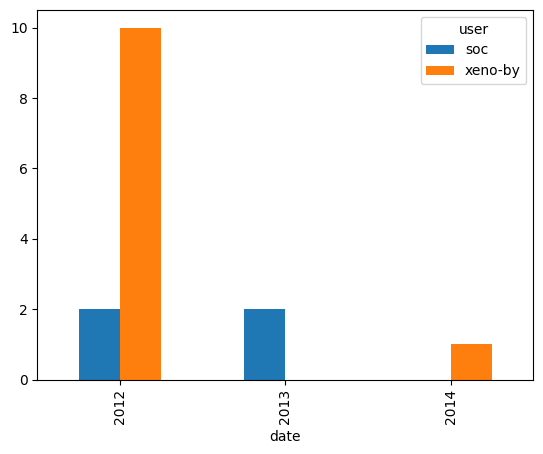

In [23]:
## Visualizing the contributions of each developer

authors = ['xeno-by', 'soc']
file = 'src/compiler/scala/reflect/reify/phases/Calculate.scala'

# Select the pull requests submitted by the authors, from the 'data' Dataframe
by_author = data[(data.user == authors[0]) | (data.user == authors[1])]

# Select the pull requests that affect the file
by_file = by_author[by_author.file==file]

# Group and count the number of PRs done by each user each year
grouped = by_file.groupby(['user', by_file['date'].dt.year]).count()['pid'].reset_index()

# Transform the data into a wide format
by_file_wide = grouped.pivot_table(index='date', columns='user', values='pid', fill_value=0)

# Plot the results
by_file_wide.plot(kind='bar')